# 1. Overview dataset

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_excel(r"C:\Users\alexs\Documents\TFM_MBD\TFM_MBD_2024_AlexSerra\data\Times_Series_Project_uoc.xlsx")

In [3]:
df.head()

,date,sales_region1,sales_region2,sales_region3,humidity_avg_Basel,humidity_avg_Bellinzona,humidity_avg_Bern,humidity_avg_Chur,humidity_avg_Distretto di Lugano,humidity_avg_Geneva,...,gtrends_CH-VS_pollen allergie,gtrends_CH-ZH_heuschnupfen,gtrends_CH-ZH_pollen,gtrends_CH-ZH_pollen allergie,influenza,pollution_Zurich_no2,pollution_Zurich_o3,pollution_Zurich_pm10,pollution_Zurich_pm25,pollution_Zurich_so2
0,2020-01-06,0.680314,1.144905,1.680806,85.688095,80.119048,92.354497,65.678571,76.190476,83.732143,...,0,0,0,0,221.0,13.942857,5.657143,15.428571,3.000000,0.500000
1,2020-01-13,1.469124,1.033474,1.395917,83.095714,80.625000,84.059524,58.386905,77.696429,80.839286,...,0,0,0,0,3.0,16.328571,5.485714,12.285714,3.714286,0.885714
2,2020-01-20,0.948362,1.026370,2.199281,78.803810,68.232143,81.423077,68.261905,67.952381,74.791667,...,0,0,0,0,530.5,14.828571,11.000000,10.714286,2.571429,0.914286
3,2020-01-27,0.885640,1.034298,1.648535,84.359601,76.678830,89.023810,61.957557,73.318723,87.666149,...,0,0,0,0,911.5,18.314286,2.685714,24.142857,5.000000,0.785714
4,2020-02-03,1.686237,0.525493,1.296067,79.455952,81.726449,78.101967,77.494565,79.429654,83.072981,...,0,0,0,0,772.0,6.985714,20.357143,6.428571,1.285714,0.371429


In [4]:
df.shape

(183, 66)

In [5]:
df.columns

Index(['date', 'sales_region1', 'sales_region2', 'sales_region3',
       'humidity_avg_Basel', 'humidity_avg_Bellinzona', 'humidity_avg_Bern',
       'humidity_avg_Chur', 'humidity_avg_Distretto di Lugano',
       'humidity_avg_Geneva', 'humidity_avg_Lausanne', 'humidity_avg_Sion',
       'humidity_avg_Zurich', 'temp_avg_k_Basel', 'temp_avg_k_Bellinzona',
       'temp_avg_k_Bern', 'temp_avg_k_Chur', 'temp_avg_k_Distretto di Lugano',
       'temp_avg_k_Geneva', 'temp_avg_k_Lausanne', 'temp_avg_k_Sion',
       'temp_avg_k_Zurich', 'gtrends_CH_allergie',
       'gtrends_CH_pollen allergie', 'gtrends_CH-BE_allergie',
       'gtrends_CH-BE_heuschnupfen', 'gtrends_CH-BE_pollen',
       'gtrends_CH-BE_pollen allergie', 'gtrends_CH-BS_heuschnupfen',
       'gtrends_CH-BS_pollen', 'gtrends_CH-FR_allergie',
       'gtrends_CH-FR_heuschnupfen', 'gtrends_CH-GR_allergie',
       'gtrends_CH-GR_heuschnupfen', 'gtrends_CH-GR_pollen',
       'gtrends_CH-LU_allergie', 'gtrends_CH-LU_heuschnupfen',
    

# 2. Creating function that preprocess dataframe

- Keep date
- Sum Sales
- Average humidity
- Average temp
- Sum all values of same gtrends (but different locations)
- Keep same values of every polution and influenza

In [6]:
def pre_general_agg(df):
    
    df_clean=pd.DataFrame()
    
    df_clean["ds"]=df["date"]
    
    l_sales = [col for col in df.columns if "sales" in col]
    df_clean["y"]=df[l_sales].sum(axis=1)
    
    l_humidity = [col for col in df.columns if "humidity" in col]
    df_clean["humidity"]=df[l_humidity].mean(axis=1)
    
    l_temp = [col for col in df.columns if "temp" in col]
    df_clean["temp"]=df[l_temp].mean(axis=1)
    
    return(df_clean)

    

In [7]:
def pre_gtrends(df, df_clean):
    
    gtrends_columns = [col for col in df.columns if 'gtrends' in col]
    gtrend_unique_col=[]
    for e in gtrends_columns:
        val=e.split("_")[2]
        if val=="allergie":
            val="_"+val
        if val not in gtrend_unique_col:
            l=[col for col in df.columns if val in col]
            df_clean["gtrends_"+val]=df[l].sum(axis=1)
    
    return (df_clean)

In [8]:
def pre_others(df, df_clean):
    
    exclude=["date", "sales", "humidity", "temp", "gtrends"]
    unique_col=[col for col in df.columns if not any(keyword in col.lower() for keyword in exclude)]
    for e in unique_col:
        df_clean[e]=df[e]
    
    df_clean.rename(columns={'gtrends__allergie': "gtrends_allergie"}, inplace=True)
    
    return(df_clean)
    

In [9]:
def preprocessing(df):
    
    df_1 = pre_general_agg(df)
    
    df_2 = pre_gtrends(df, df_1)
    
    df_3 = pre_others(df, df_2)
    
    return df_3    

In [10]:
df_clean= preprocessing(df)

In [11]:
df_clean.head(5)

,ds,y,humidity,temp,gtrends_allergie,gtrends_pollen allergie,gtrends_heuschnupfen,gtrends_pollen,influenza,pollution_Zurich_no2,pollution_Zurich_o3,pollution_Zurich_pm10,pollution_Zurich_pm25,pollution_Zurich_so2
0,2020-01-06,3.506025,81.875606,274.946388,115,0,8,22,221.0,13.942857,5.657143,15.428571,3.000000,0.500000
1,2020-01-13,3.898515,77.805608,275.982323,176,0,36,39,3.0,16.328571,5.485714,12.285714,3.714286,0.885714
2,2020-01-20,4.174013,73.820989,275.575986,140,0,5,27,530.5,14.828571,11.000000,10.714286,2.571429,0.914286
3,2020-01-27,3.568473,80.112456,274.589907,150,0,5,83,911.5,18.314286,2.685714,24.142857,5.000000,0.785714
4,2020-02-03,3.507797,79.792778,279.608504,98,0,32,10,772.0,6.985714,20.357143,6.428571,1.285714,0.371429


In [15]:
#df_clean.to_csv(r"C:\Users\alexs\Documents\TFM_MBD\TFM_MBD_2024_AlexSerra\preprocessed_data\other_europe.csv", index=False)

# 3. Train and Test

In [12]:
df_clean.shape[0]

183

In [13]:
train_lim = int(df_clean.shape[0]*0.7)
df_train = df_clean.iloc[:train_lim]
df_test = df_clean.iloc[train_lim:]

# 4. Prophet

In [14]:
from prophet import Prophet

In [15]:
model = Prophet()

In [16]:
model.fit(df_train)

14:20:51 - cmdstanpy - INFO - Chain [1] start processing
14:20:52 - cmdstanpy - INFO - Chain [1] done processing


In [17]:
forecast = model.predict(df_test[["ds"]])

In [18]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2022-06-20,3.299308,1.872707,3.369143,3.299308,3.299308,-0.665606,-0.665606,-0.665606,-0.665606,-0.665606,-0.665606,0.0,0.0,0.0,2.633702
1,2022-06-27,3.307058,1.898838,3.392536,3.306894,3.307258,-0.650269,-0.650269,-0.650269,-0.650269,-0.650269,-0.650269,0.0,0.0,0.0,2.656789
2,2022-07-04,3.314807,1.968051,3.480777,3.314377,3.315336,-0.609714,-0.609714,-0.609714,-0.609714,-0.609714,-0.609714,0.0,0.0,0.0,2.705094
3,2022-07-11,3.322557,1.952801,3.385529,3.321745,3.323519,-0.636839,-0.636839,-0.636839,-0.636839,-0.636839,-0.636839,0.0,0.0,0.0,2.685718
4,2022-07-18,3.330307,1.860663,3.375279,3.328988,3.331864,-0.757972,-0.757972,-0.757972,-0.757972,-0.757972,-0.757972,0.0,0.0,0.0,2.572335
5,2022-07-25,3.338057,1.708859,3.187068,3.336242,3.340231,-0.897007,-0.897007,-0.897007,-0.897007,-0.897007,-0.897007,0.0,0.0,0.0,2.441050
6,2022-08-01,3.345806,1.636355,3.166478,3.343410,3.348740,-0.948268,-0.948268,-0.948268,-0.948268,-0.948268,-0.948268,0.0,0.0,0.0,2.397538
7,2022-08-08,3.353556,1.734257,3.234698,3.350499,3.357195,-0.867673,-0.867673,-0.867673,-0.867673,-0.867673,-0.867673,0.0,0.0,0.0,2.485884
8,2022-08-15,3.361306,1.953917,3.439617,3.357394,3.365644,-0.685006,-0.685006,-0.685006,-0.685006,-0.685006,-0.685006,0.0,0.0,0.0,2.676300
9,2022-08-22,3.369056,2.200927,3.633852,3.364369,3.374239,-0.444205,-0.444205,-0.444205,-0.444205,-0.444205,-0.444205,0.0,0.0,0.0,2.924850


In [19]:
def calculate_mape(actual, predicted):
    actual, predicted = np.array(actual), np.array(predicted)
    return np.mean(np.abs((actual - predicted) / actual)) * 100

In [20]:
mape=calculate_mape(df_test["y"],forecast["yhat"] )

In [21]:
print(f'MAPE: {mape:.2f}%')

MAPE: 21.12%


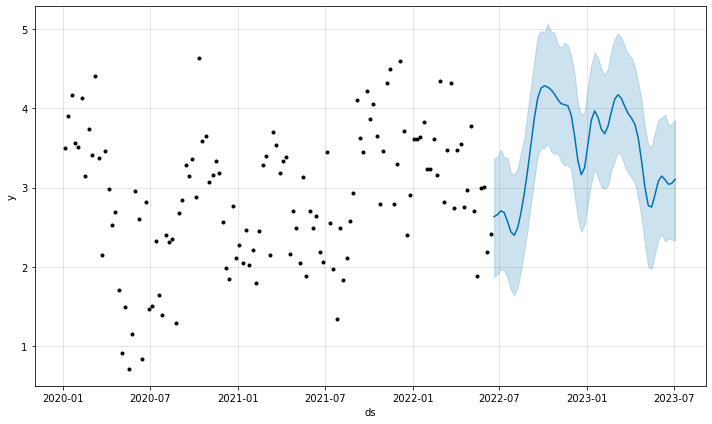

In [22]:
fig1 = model.plot(forecast)

## 5. Prophet adding regressors

In [23]:
model_multiva = Prophet()

In [24]:
for e in df_train.columns[2:]:
    model_multiva.add_regressor(e)

In [25]:
model_multiva.fit(df_train)

14:20:52 - cmdstanpy - INFO - Chain [1] start processing
14:20:52 - cmdstanpy - INFO - Chain [1] done processing


In [26]:
forecast_multiva = model_multiva.predict(df_test.drop(columns="y"))

In [27]:
mape=calculate_mape(df_test["y"],forecast_multiva["yhat"] )

print(f'MAPE: {mape:.2f}%')

MAPE: 21.86%


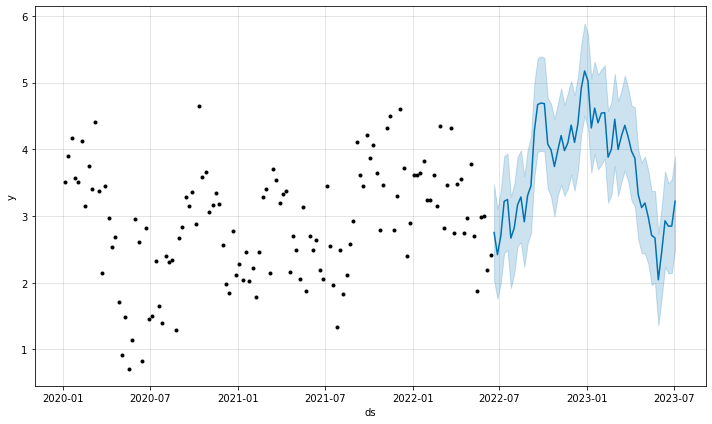

In [28]:
fig1 = model_multiva.plot(forecast_multiva)

# 6. AutoArima

In [29]:
from pmdarima import auto_arima

In [30]:
df_arima = df_clean.copy()

In [31]:
df_arima.set_index('ds', inplace=True)

In [32]:
df_arima = df_arima[["y"]]

In [33]:
df_arima

,y
ds,
2020-01-06,3.506025
2020-01-13,3.898515
2020-01-20,4.174013
2020-01-27,3.568473
2020-02-03,3.507797
...,...
2023-06-05,2.316237
2023-06-12,2.038207
2023-06-19,2.551148


In [34]:
train_lim = int(df_clean.shape[0]*0.7)
df_train_arima = df_arima.iloc[:train_lim]
df_test_arima = df_arima.iloc[train_lim:]

In [35]:
# Train AutoARIMA model
model_autoarima = auto_arima(df_train_arima, 
                   seasonal=True,  # Change to True if you want to fit a seasonal ARIMA

                   stepwise=True,   # Set to False to perform a more exhaustive search
                   trace=True)      # Set to True to see the search progress

# Print the best model parameters
print(model_autoarima.summary())


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=268.565, Time=0.12 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=325.069, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=278.007, Time=0.04 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=292.544, Time=0.03 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=646.754, Time=0.02 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=267.768, Time=0.08 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=290.754, Time=0.04 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=265.856, Time=0.06 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=267.825, Time=0.15 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=274.014, Time=0.10 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=272.651, Time=0.04 sec

Best model:  ARIMA(1,0,1)(0,0,0)[0] intercept
Total fit time: 0.748 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  128
Model: 

In [36]:
forecast_autoarima = model_autoarima.predict(n_periods=df_test_arima.shape[0])

In [37]:
mape=calculate_mape(df_test_arima["y"],forecast_autoarima.values )

print(f'MAPE: {mape:.2f}%')

MAPE: 21.07%


# 7. Ensembling 

In [38]:
df_pre_ensemblin= pd.DataFrame()

In [39]:
df_pre_ensemblin

""


In [40]:
df_pre_ensemblin["ds"]=forecast["ds"]

In [41]:
df_pre_ensemblin["prophet"]=forecast["yhat"]

In [42]:
df_pre_ensemblin["prophet_multi"]=forecast_multiva["yhat"]

In [43]:
df_pre_ensemblin["autoarima"]=forecast_autoarima.values

In [44]:
df_pre_ensemblin["real_values"]=df_test["y"].values

In [45]:
df_pre_ensemblin["average_predictions"] = df_pre_ensemblin[['prophet', 'prophet_multi', 'autoarima']].mean(axis=1)

In [46]:
df_pre_ensemblin.head()

,ds,prophet,prophet_multi,autoarima,real_values,average_predictions
0,2022-06-20,2.633702,2.753143,2.579606,1.882727,2.655483
1,2022-06-27,2.656789,2.420534,2.613922,3.316822,2.563748
2,2022-07-04,2.705094,2.702618,2.644592,3.258625,2.684101
3,2022-07-11,2.685718,3.219514,2.672004,2.966160,2.859079
4,2022-07-18,2.572335,3.248087,2.696504,2.406324,2.838975


In [47]:
mape=calculate_mape(df_pre_ensemblin["real_values"],df_pre_ensemblin["average_predictions"] )

print(f'MAPE: {mape:.2f}%')

MAPE: 17.80%


# 8. Meta Learner Linear Regression

In [48]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [49]:
lr = LinearRegression()

In [50]:
X_train = df_pre_ensemblin[["prophet", "prophet_multi", "autoarima"]]
y_train = df_pre_ensemblin["real_values"]

In [51]:
lr.fit(X_train, y_train)

LinearRegression()

In [52]:
y_pred = lr.predict(X_train)

In [53]:
mse = mean_squared_error(y_train, y_pred)
r2 = r2_score(y_train, y_pred)

In [54]:
print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

Mean Squared Error: 0.39208498478428544
R^2 Score: 0.5307122474637416


In [55]:
y_pred

array([2.51070954, 2.16820313, 2.46910253, 3.05075033, 3.15187876,
       2.60888759, 2.80597202, 3.14917577, 3.19573138, 2.69150468,
       2.98509999, 2.99250103, 3.72445507, 4.03845714, 4.00642928,
       3.98746012, 3.3515656 , 3.27686247, 3.04080193, 3.33518209,
       3.6008874 , 3.36743394, 3.49994663, 3.8414757 , 3.68925409,
       4.13821054, 4.79065854, 5.02994631, 4.73201618, 3.83649616,
       4.09998782, 3.90334453, 4.13080386, 4.16460393, 3.40513062,
       3.4490642 , 3.85435017, 3.34475092, 3.58625373, 3.80330073,
       3.65752396, 3.45776363, 3.38115624, 2.87712013, 2.80743912,
       3.03900117, 2.91798741, 2.63605354, 2.52212702, 1.7685779 ,
       2.18625458, 2.70710509, 2.64846722, 2.64434307, 3.01965487])

In [56]:
# Print the coefficients of the model
print('Coefficients:', lr.coef_)
print('Intercept:', lr.intercept_)

Coefficients: [-0.46937619  1.07016157  0.70740571]
Intercept: -1.0242288036424254


In [57]:
mape=calculate_mape(df_pre_ensemblin["real_values"],y_pred)

print(f'MAPE: {mape:.2f}%')

MAPE: 16.84%


# 9. Meta Learner XGbooster

In [59]:
from xgboost import XGBRegressor

In [60]:
X_train = df_pre_ensemblin[["prophet", "prophet_multi", "autoarima"]]
y_train = df_pre_ensemblin["real_values"]

In [86]:
# Create an XGBRegressor model
xgb = XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42, max_depth=1, learning_rate=0.1, alpha=0.01,
                  subsample=0.8)

# Train the model using the training data
xgb.fit(X_train, y_train)


XGBRegressor(alpha=0.01, base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=1, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, ...)

In [87]:
y_pred_xgb = xgb.predict(X_train)

In [88]:
mse = mean_squared_error(y_train, y_pred_xgb)
r2 = r2_score(y_train, y_pred_xgb)

In [89]:
print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

Mean Squared Error: 0.16312863996152052
R^2 Score: 0.8047508173159028


In [90]:
y_pred_xgb

array([2.5747323, 2.9715843, 2.9715843, 2.7275605, 2.6128383, 2.856862 ,
       2.6128383, 2.6128383, 2.7275605, 2.7275605, 2.8178382, 3.2458797,
       4.1406097, 3.844752 , 3.8711069, 3.8711069, 3.2672646, 3.2672646,
       3.2170637, 3.4354882, 3.5390384, 3.407127 , 3.5390384, 4.1096244,
       3.9064364, 4.3720856, 5.2141385, 5.404529 , 5.2873373, 4.138898 ,
       3.7834928, 3.9383917, 4.2008524, 4.2008524, 3.6032917, 3.2358937,
       3.8618152, 3.305993 , 3.2947633, 3.5010312, 3.128522 , 3.3341134,
       3.1038458, 3.0575993, 2.8199494, 2.5392807, 2.5392807, 2.7537434,
       2.7833045, 2.7833045, 2.603318 , 2.3592942, 2.3592942, 2.3592942,
       2.3592942], dtype=float32)

In [91]:
mape=calculate_mape(df_pre_ensemblin["real_values"],y_pred_xgb)

print(f'MAPE: {mape:.2f}%')

MAPE: 10.46%
